In [1]:
import pickle as pkl

import lxml
import pandas as pd
import numpy as np
#import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow.keras
from tensorflow.keras.datasets import imdb


from tqdm.notebook import tqdm

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import f1_score

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from ast import literal_eval
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Activation, Dropout, Conv1D, Flatten, MaxPooling1D,\
                        AveragePooling1D, Concatenate, LeakyReLU, Embedding,\
                        GlobalMaxPooling1D,GlobalAveragePooling1D,GaussianNoise,BatchNormalization,Add
from tensorflow.keras.initializers import glorot_uniform
#from tensorflow.keras.utils.vis_utils import plot_model

import importlib
from sklearn.metrics import roc_curve, roc_auc_score
from tensorflow.keras.utils import plot_model

importlib.reload(plt)

<module 'matplotlib.pyplot' from '/miniconda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [2]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    
    NOTE: Taken from sklearn example
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = [0,1]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize = (8, 8))
    
    #ax.figsize((10, 10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    ax.plot()
    fig.tight_layout()
    fig.show()
    #return ax

In [3]:
model = tensorflow.keras.models.load_model('../data/models/CNN_GPU_VGG_Multi_Channel_0.model')

In [ ]:
drugbank = pd.read_csv('../data/intermediate/interactions_preprocessed_OG.csv', iterator = False, converters={"target_gene_encoded_padded": \
                                                                                     lambda x: np.array(x.strip("[]").replace("'","").split(", ")),
                                                                                    "drug_fingerprint_encoded_padded": \
                                                                                    lambda x: np.array(x.strip("[]").replace("'","").split(", "))})



In [14]:
#drugbank = pd.read_csv('../data/intermediate/interactions_preprocessed.csv', chunksize = 500, iterator = True, converters={"target_gene_encoded_padded": \
#                                                                                     lambda x: np.array(x.strip("[]").replace("'","").split(", ")),
#                                                                                    "drug_fingerprint_encoded_padded": \
#  

In [15]:
drugbank = drugbank.sort_values(['drug_id', 'Y'], ascending = False)

drugbank_test_sets = np.array_split(drugbank, len(drugbank)/500)[:5]

In [16]:
len(drugbank_test_sets)

5

In [6]:
trim_width = 0

Y_test_actual = []
Y_test_predictions = []

for drugbank_test in drugbank_test_sets:  
    
    print('Padding..') 
    X_0 = np.array(list(drugbank_test['target_gene_encoded_padded']))
    X_1 = np.array(list(drugbank_test['drug_fingerprint_encoded_padded']))
    Y   = np.array(list(drugbank_test['Y']))


    X_0_test = np.array(list(drugbank_test['target_gene_encoded_padded']))
    X_1_test = np.array(list(drugbank_test['drug_fingerprint_encoded_padded']))

    Y_test_actual.extend(np.array(list(drugbank_test['Y'])))

    print(X_0.shape)
    print(X_1.shape)

    print(X_0_test.shape)
    print(X_1_test.shape)

    print('Trimming..')
    X_0 = X_0[:, int(trim_width/2) : X_0.shape[1] - int(trim_width/2)]
    X_1 = X_1[:, int(trim_width/2) : X_1.shape[1] - int(trim_width/2)]

    X_0_test = X_0_test[:, int(trim_width/2) : X_0_test.shape[1] - int(trim_width/2)]
    X_1_test = X_1_test[:, int(trim_width/2) : X_1_test.shape[1] - int(trim_width/2)]


    X_0 = X_0.astype(int) + 1
    X_1 = X_1.astype(int) + 1
    #Y   = Y.astype(int)

    X_0_test = X_0_test.astype(int) + 1
    X_1_test = X_1_test.astype(int) + 1
    #Y_test   = Y_test.astype(int)

    print(X_0.shape)
    print(X_1.shape)

    print(X_0_test.shape)
    print(X_1_test.shape)

    #X_0 = np.hstack((X_0, X_1))
    #X_0_test = np.hstack((X_0_test, X_1_test))

    Y_test_predictions.extend(model.predict([X_1_test[..., np.newaxis],X_0_test[..., np.newaxis]]))
    




Padding..
(503, 21222)
(503, 9501)
(503, 21222)
(503, 9501)
Trimming..
(503, 21222)
(503, 9501)
(503, 21222)
(503, 9501)
Padding..
(503, 21222)
(503, 9501)
(503, 21222)
(503, 9501)
Trimming..
(503, 21222)
(503, 9501)
(503, 21222)
(503, 9501)
Padding..
(503, 21222)
(503, 9501)
(503, 21222)
(503, 9501)
Trimming..
(503, 21222)
(503, 9501)
(503, 21222)
(503, 9501)
Padding..
(503, 21222)
(503, 9501)
(503, 21222)
(503, 9501)
Trimming..
(503, 21222)
(503, 9501)
(503, 21222)
(503, 9501)
Padding..
(503, 21222)
(503, 9501)
(503, 21222)
(503, 9501)
Trimming..
(503, 21222)
(503, 9501)
(503, 21222)
(503, 9501)


In [7]:
#Y_test_predictions = np.array(Y_test_predictions).ravel()

roc_auc_score:  0.9256758383741606


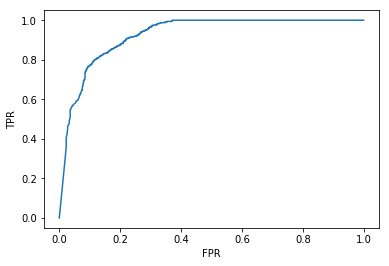

-----


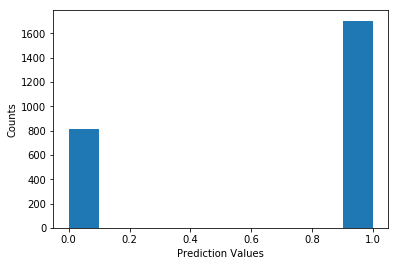

Confusion_matrix[[ 810  504]
 [   0 1201]]
f1-score: 0.8265657260839642
             precision    recall  f1-score   support

          0       1.00      0.62      0.76      1314
          1       0.70      1.00      0.83      1201

avg / total       0.86      0.80      0.79      2515



In [9]:
false_positive_rate, true_positive_rate, threshold = roc_curve(Y_test_actual , Y_test_predictions)

print('roc_auc_score: ', roc_auc_score(Y_test_actual, Y_test_predictions))

plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

print('-----')


Y_test_predictions_bin = [1 if (i > 0.85) else 0 for i in Y_test_predictions ]


plt.hist(Y_test_predictions_bin)
plt.xlabel('Prediction Values')
plt.ylabel('Counts')
plt.show()

cm = confusion_matrix(Y_test_actual, Y_test_predictions_bin)

print('Confusion_matrix' + str(cm))

print('f1-score: ' + str(f1_score(Y_test_actual, Y_test_predictions_bin)))


print(classification_report(Y_test_actual, Y_test_predictions_bin))




In [10]:
len(Y_test_actual)

2515

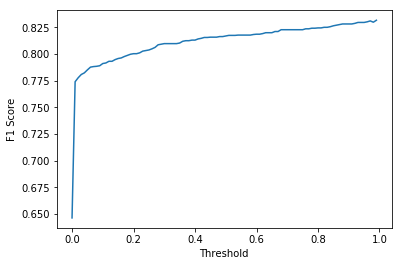

In [11]:
f1_scores = []
plot_x = []

for j in np.arange(0.0, 1.0, 0.01):
    f1_scores.append(f1_score(Y_test_actual, [1 if (i > j) else 0 for i in Y_test_predictions]))
    plot_x.append(j)

plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.plot(plot_x, f1_scores)

In [44]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_26 (InputLayer)           (None, 21222, 1)     0                                            
__________________________________________________________________________________________________
input_25 (InputLayer)           (None, 9501, 1)      0                                            
__________________________________________________________________________________________________
conv1d_150 (Conv1D)             (None, 10608, 256)   2304        input_26[0][0]                   
__________________________________________________________________________________________________
conv1d_151 (Conv1D)             (None, 4747, 512)    4608        input_25[0][0]                   
__________________________________________________________________________________________________
conv1d_152

In [89]:
import sys
!{sys.executable} -m cond install -v pydot

/miniconda/bin/python: No module named apt


In [ ]:
sys.path

In [90]:
import pydot

In [5]:
plot_model(model, to_file='CNN_GPU_VGG_Multi_Channel.png')

Normalized confusion matrix
[[0.61643836 0.38356164]
 [0.         1.        ]]


/miniconda/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


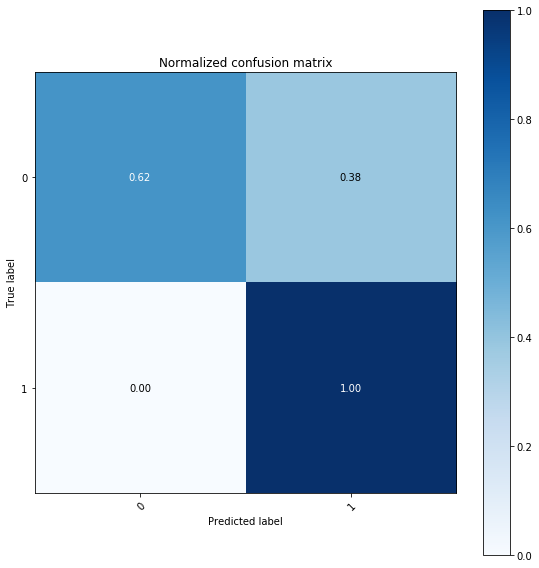

In [12]:

plot_confusion_matrix(Y_test_actual, Y_test_predictions_bin, normalize = True, classes = [0,1])

In [13]:
f1_score(Y_test_actual, Y_test_predictions_bin)

0.8265657260839642